In [479]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

%matplotlib inline 

In [480]:
# from google.colab import drive
# drive.mount('/content/drive')

In [481]:
%%time
#edx_data = pd.read_csv('/content/drive/My Drive/AC221_Group/PS1/APCOMP221Pset1.csv')
edx_data = pd.read_csv("APCOMP221Pset1.csv")

<string>:2: DtypeWarning: Columns (49,50,64) have mixed types.Specify dtype option on import or set low_memory=False.


Wall time: 12.3 s


In [482]:
edx_data.shape

(1141735, 92)

In [483]:
# list of quasi-identifiers
qi_list = ['course_id',
            'cc_by_ip',
            'countryLabel',
            'continent',
            'city',
            'region',
            'subdivision',
            'postalCode',
            'LoE',
            'YoB',
            'gender',
            'nforum_posts',
            'nforum_votes',
            'nforum_endorsed',
            'nforum_threads',
            'nforum_comments',
            'nforum_pinned',
            'nforum_events',
            'mode',
            'email_domain']

In [484]:
edx_data.dtypes

course_id                    object
user_id                       int64
username                     object
registered                     bool
viewed                         bool
                             ...   
roles_isSales               float64
forumRoles_isAdmin          float64
forumRoles_isCommunityTA    float64
forumRoles_isModerator      float64
forumRoles_isStudent        float64
Length: 92, dtype: object

In [485]:
# number of unique user_IDs
edx_data.user_id.nunique()

936434

In [486]:
# number of courses
edx_data.course_id.nunique()

280

In [487]:
# course_id and user_id together uniquely identify each row
edx_data[['course_id', 'user_id']].drop_duplicates()

,course_id,user_id
0,HarvardX/PH525.1x/1T2018,1488411
1,HarvardX/PH525.1x/1T2018,7013084
2,HarvardX/PH525.1x/1T2018,4083257
3,HarvardX/PH525.1x/1T2018,4605571
4,HarvardX/PH525.1x/1T2018,1499820
...,...,...
1141730,HarvardX/PH525.5x/2T2018,1388822
1141731,HarvardX/PH525.5x/2T2018,9210079
1141732,HarvardX/PH525.5x/2T2018,6212000
1141733,HarvardX/PH525.5x/2T2018,945808


In [488]:
edx_data.nforum_events.value_counts()

0.0       804832
1.0        14788
2.0         8720
3.0         4993
4.0         3880
           ...  
1309.0         1
1311.0         1
1329.0         1
1332.0         1
1174.0         1
Name: nforum_events, Length: 1035, dtype: int64

In [489]:
#np.sort(edx_data.course_id.unique())

## Q3: k-Anonymity via Suppression

In [490]:
# create a dataframe that only contains the QIs
qi_df = edx_data[qi_list]
qi_df

,course_id,cc_by_ip,countryLabel,continent,city,region,subdivision,postalCode,LoE,YoB,gender,nforum_posts,nforum_votes,nforum_endorsed,nforum_threads,nforum_comments,nforum_pinned,nforum_events,mode,email_domain
0,HarvardX/PH525.1x/1T2018,GB,United Kingdom,Europe,Middlesbrough,MDB,Middlesbrough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,hotmail.co.uk
1,HarvardX/PH525.1x/1T2018,US,United States,Americas,Seattle,WA,Washington,98105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com
2,HarvardX/PH525.1x/1T2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com
3,HarvardX/PH525.1x/1T2018,US,United States,North America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,hotmail.com
4,HarvardX/PH525.1x/1T2018,HU,Hungary,Europe,Budapest,BU,Budapest fovaros,NaN,b,1986.0,m,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141730,HarvardX/PH525.5x/2T2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,audit,icloud.com
1141731,HarvardX/PH525.5x/2T2018,IN,India,Asia,Delhi,DL,National Capital Territory of Delhi,110002,hs,1999.0,f,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com
1141732,HarvardX/PH525.5x/2T2018,CN,China,Asia,Beijing,11,Beijing Shi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,qq.com
1141733,HarvardX/PH525.5x/2T2018,BR,Brazil,Americas,Almirante Tamandaré,PR,Parana,NaN,b,1987.0,m,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com


In [491]:
# concatenate all QIs into a single string, and add this as a field
qi_df['qi_key'] = qi_df.astype(str).apply(lambda row: '_'.join(row.values), axis=1)

C:\Users\Victor\Miniconda3\envs\cs109b\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [492]:
qi_df

,course_id,cc_by_ip,countryLabel,continent,city,region,subdivision,postalCode,LoE,YoB,...,nforum_posts,nforum_votes,nforum_endorsed,nforum_threads,nforum_comments,nforum_pinned,nforum_events,mode,email_domain,qi_key
0,HarvardX/PH525.1x/1T2018,GB,United Kingdom,Europe,Middlesbrough,MDB,Middlesbrough,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,hotmail.co.uk,HarvardX/PH525.1x/1T2018_GB_United Kingdom_Eur...
1,HarvardX/PH525.1x/1T2018,US,United States,Americas,Seattle,WA,Washington,98105,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_US_United States_Amer...
2,HarvardX/PH525.1x/1T2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_nan_nan_nan_nan_nan_n...
3,HarvardX/PH525.1x/1T2018,US,United States,North America,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,hotmail.com,HarvardX/PH525.1x/1T2018_US_United States_Nort...
4,HarvardX/PH525.1x/1T2018,HU,Hungary,Europe,Budapest,BU,Budapest fovaros,NaN,b,1986.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_HU_Hungary_Europe_Bud...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141730,HarvardX/PH525.5x/2T2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,audit,icloud.com,HarvardX/PH525.5x/2T2018_nan_nan_nan_nan_nan_n...
1141731,HarvardX/PH525.5x/2T2018,IN,India,Asia,Delhi,DL,National Capital Territory of Delhi,110002,hs,1999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.5x/2T2018_IN_India_Asia_Delhi_D...
1141732,HarvardX/PH525.5x/2T2018,CN,China,Asia,Beijing,11,Beijing Shi,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,qq.com,HarvardX/PH525.5x/2T2018_CN_China_Asia_Beijing...
1141733,HarvardX/PH525.5x/2T2018,BR,Brazil,Americas,Almirante Tamandaré,PR,Parana,NaN,b,1987.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.5x/2T2018_BR_Brazil_Americas_Al...


In [493]:
# add key column to full data set
edx_data['qi_key'] = qi_df.qi_key
edx_data.head()

,course_id,user_id,username,registered,viewed,explored,certified,completed,ip,cc_by_ip,...,roles_isStaff,roles_isCCX,roles_isFinance,roles_isLibrary,roles_isSales,forumRoles_isAdmin,forumRoles_isCommunityTA,forumRoles_isModerator,forumRoles_isStudent,qi_key
0,HarvardX/PH525.1x/1T2018,1488411,KIRSTEN SUAREZ,True,False,NaN,False,False,81.108.107.58,GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,HarvardX/PH525.1x/1T2018_GB_United Kingdom_Eur...
1,HarvardX/PH525.1x/1T2018,7013084,CAREY FOSTER,True,True,True,False,False,205.175.107.76,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,HarvardX/PH525.1x/1T2018_US_United States_Amer...
2,HarvardX/PH525.1x/1T2018,4083257,CLAUDINE FARMER,True,True,False,False,False,103.212.146.137,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,HarvardX/PH525.1x/1T2018_nan_nan_nan_nan_nan_n...
3,HarvardX/PH525.1x/1T2018,4605571,SHEREE BONNER,True,True,False,False,False,172.221.204.94,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,HarvardX/PH525.1x/1T2018_US_United States_Nort...
4,HarvardX/PH525.1x/1T2018,1499820,MITCHELL VALDEZ,True,True,True,False,False,193.225.200.92,HU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,HarvardX/PH525.1x/1T2018_HU_Hungary_Europe_Bud...


In [65]:
#edx_data.head().to_csv("added_key_df.csv")

In [494]:
# count number of rows for each QI key
qi_key_counts = qi_df.qi_key.value_counts().rename_axis('qi_key').reset_index(name='counts')
qi_key_counts

,qi_key,counts
0,HarvardX/CS50x3/2015_nan_nan_nan_nan_nan_nan_n...,1629
1,HarvardX/CS50/X_nan_nan_nan_nan_nan_nan_nan_na...,1419
2,HarvardX/CS50/X_nan_nan_nan_nan_nan_nan_nan_na...,1245
3,HarvardX/CS50x3/2015_nan_nan_nan_nan_nan_nan_n...,989
4,HarvardX/CS50x3/2015_nan_nan_nan_nan_nan_nan_n...,715
...,...,...
992003,HarvardX/SW12.8x/3T2014_CA_Canada_Americas_Ott...,1
992004,HarvardX/PH556/1T2017_RU_Russian Federation_Eu...,1
992005,HarvardX/HDS3221.3x/2T2016_GB_United Kingdom_E...,1
992006,HarvardX/CS50x3/2015_CA_Canada_Americas_Victor...,1


In [495]:
# get QI keys that violate k-anonymity: the corresponding rows will be suppressed
qi_key_counts.query('counts < 3')

,qi_key,counts
17255,HarvardX/GSE2x/1T2016_nan_nan_nan_nan_nan_nan_...,2
17256,HarvardX/HUM1.5x/3T2015_nan_nan_nan_nan_nan_na...,2
17257,HarvardX/ENGSCI137x/2T2016_nan_nan_nan_nan_nan...,2
17258,HarvardX/HUM12x/3T2016_nan_nan_nan_nan_nan_nan...,2
17259,HarvardX/CS50x3/2015_JP_Japan_Asia_Tokyo_13_Tō...,2
...,...,...
992003,HarvardX/SW12.8x/3T2014_CA_Canada_Americas_Ott...,1
992004,HarvardX/PH556/1T2017_RU_Russian Federation_Eu...,1
992005,HarvardX/HDS3221.3x/2T2016_GB_United Kingdom_E...,1
992006,HarvardX/CS50x3/2015_CA_Canada_Americas_Victor...,1


In [500]:
print('# and % of rows remaining at different levels of k-anonymity:')
print('k=3:', qi_key_counts.query('counts >= 3').counts.sum(), qi_key_counts.query('counts >= 3').counts.sum() / edx_data.shape[0])
print('k=4:', qi_key_counts.query('counts >= 4').counts.sum(), qi_key_counts.query('counts >= 4').counts.sum() / edx_data.shape[0])
print('k=5:', qi_key_counts.query('counts >= 5').counts.sum(), qi_key_counts.query('counts >= 5').counts.sum() / edx_data.shape[0])

# and % of rows remaining at different levels of k-anonymity:
k=3: 141749 0.12415227701699606
k=4: 120995 0.10597467888783299
k=5: 108195 0.09476367107954123


In [501]:
# keep only the rows that do satisfy k-anonymity
k3_sup_df = edx_data[edx_data.qi_key.isin(qi_key_counts.query('counts >= 3').qi_key)]
k4_sup_df = edx_data[edx_data.qi_key.isin(qi_key_counts.query('counts >= 4').qi_key)]
k5_sup_df = edx_data[edx_data.qi_key.isin(qi_key_counts.query('counts >= 5').qi_key)]

In [503]:
k3_sup_df.shape

(141749, 93)

In [504]:
k4_sup_df.shape

(120995, 93)

In [505]:
k5_sup_df.shape

(108195, 93)

In [506]:
comp_rate_k3_sup = k3_sup_df.groupby('course_id').completed.mean().reset_index()
comp_rate_k3_sup.rename(columns={'completed':'completed_k3'}, inplace=True)
comp_rate_k3_sup

,course_id,completed_k3
0,HarvardX/1368.1x/2T2016,0.000000
1,HarvardX/1368.2x/2T2016,0.000000
2,HarvardX/1368.4x/2T2016,0.000000
3,HarvardX/1368x/2T2017,0.000000
4,HarvardX/AI12.1x/2013_SOND,0.000000
...,...,...
244,Harvardx/HLS2X/4T2017,0.008065
245,Harvardx/HLS2X/T12016,0.004024
246,VJx/VJx/3T2014,0.000000
247,VJx/VJx_2/3T2016,0.000000


In [507]:
comp_rate_k4_sup = k4_sup_df.groupby('course_id').completed.mean().reset_index()
comp_rate_k4_sup.rename(columns={'completed':'completed_k4'}, inplace=True)
comp_rate_k4_sup

,course_id,completed_k4
0,HarvardX/1368.1x/2T2016,0.000000
1,HarvardX/1368.4x/2T2016,0.000000
2,HarvardX/1368x/2T2017,0.000000
3,HarvardX/AI12.1x/2013_SOND,0.000000
4,HarvardX/AI12.2x/2013_SOND,0.000000
...,...,...
222,Harvardx/HLS2X/4T2017,0.010309
223,Harvardx/HLS2X/T12016,0.002370
224,VJx/VJx/3T2014,0.000000
225,VJx/VJx_2/3T2016,0.000000


In [508]:
comp_rate_k5_sup = k5_sup_df.groupby('course_id').completed.mean().reset_index()
comp_rate_k5_sup.rename(columns={'completed':'completed_k5'}, inplace=True)
comp_rate_k5_sup

,course_id,completed_k5
0,HarvardX/1368.1x/2T2016,0.000000
1,HarvardX/1368x/2T2017,0.000000
2,HarvardX/AI12.1x/2013_SOND,0.000000
3,HarvardX/AI12.2x/2013_SOND,0.000000
4,HarvardX/AT1x/2T2014,0.008013
...,...,...
210,Harvardx/HLS2X/4T2017,0.012346
211,Harvardx/HLS2X/T12016,0.002959
212,VJx/VJx/3T2014,0.000000
213,VJx/VJx_2/3T2016,0.000000


In [509]:
comp_rate_full = edx_data.groupby('course_id').completed.mean().reset_index()
comp_rate_full.rename(columns={'completed':'completed_full'}, inplace=True)
comp_rate_full

,course_id,completed_full
0,HarvardX/1368.1x/2T2016,0.033439
1,HarvardX/1368.1x/3T2014,0.064228
2,HarvardX/1368.2x/2T2015,0.063197
3,HarvardX/1368.2x/2T2016,0.093750
4,HarvardX/1368.3x/2T2015,0.080645
...,...,...
275,Harvardx/HLS2X/T12016,0.088883
276,VJx/VJx/3T2014,0.078947
277,VJx/VJx/3T2015,0.089744
278,VJx/VJx_2/3T2016,0.044908


In [510]:
# comp_rate_full.merge(comp_rate_k3_sup, on='course_id', how='outer').merge(comp_rate_k4_sup, on='course_id', how='outer').merge(comp_rate_k5_sup, on='course_id', how='outer')

# df = data_frames[0]
# for df_ in data_frames[1:]:
#     df = df.merge(df_, on='course_id', how='outer')

In [511]:
comp_rate_df_list = [comp_rate_full, comp_rate_k3_sup, comp_rate_k4_sup, comp_rate_k5_sup]

In [512]:
comp_rate_table = reduce(lambda  left, right: pd.merge(left, right, on='course_id', how='outer'), comp_rate_df_list)
comp_rate_table

,course_id,completed_full,completed_k3,completed_k4,completed_k5
0,HarvardX/1368.1x/2T2016,0.033439,0.000000,0.00000,0.000000
1,HarvardX/1368.1x/3T2014,0.064228,NaN,NaN,NaN
2,HarvardX/1368.2x/2T2015,0.063197,NaN,NaN,NaN
3,HarvardX/1368.2x/2T2016,0.093750,0.000000,NaN,NaN
4,HarvardX/1368.3x/2T2015,0.080645,NaN,NaN,NaN
...,...,...,...,...,...
275,Harvardx/HLS2X/T12016,0.088883,0.004024,0.00237,0.002959
276,VJx/VJx/3T2014,0.078947,0.000000,0.00000,0.000000
277,VJx/VJx/3T2015,0.089744,NaN,NaN,NaN
278,VJx/VJx_2/3T2016,0.044908,0.000000,0.00000,0.000000


In [514]:
comp_rate_table.to_csv('comp_rate_table.csv')

## Q4: k-Anonymity via Synthetic Records

In [515]:
# create a dataframe that has a single copy of the QI columns for each QI key that violates k-anonymity
qi_df_unique = qi_df[qi_df.qi_key.isin(qi_key_counts.query('counts < 3').qi_key)].drop_duplicates()
qi_df_unique

,course_id,cc_by_ip,countryLabel,continent,city,region,subdivision,postalCode,LoE,YoB,...,nforum_posts,nforum_votes,nforum_endorsed,nforum_threads,nforum_comments,nforum_pinned,nforum_events,mode,email_domain,qi_key
0,HarvardX/PH525.1x/1T2018,GB,United Kingdom,Europe,Middlesbrough,MDB,Middlesbrough,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,hotmail.co.uk,HarvardX/PH525.1x/1T2018_GB_United Kingdom_Eur...
1,HarvardX/PH525.1x/1T2018,US,United States,Americas,Seattle,WA,Washington,98105,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_US_United States_Amer...
4,HarvardX/PH525.1x/1T2018,HU,Hungary,Europe,Budapest,BU,Budapest fovaros,NaN,b,1986.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_HU_Hungary_Europe_Bud...
5,HarvardX/PH525.1x/1T2018,BR,Brazil,Americas,Guarulhos,SP,Sao Paulo,NaN,m,1980.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_BR_Brazil_Americas_Gu...
7,HarvardX/PH525.1x/1T2018,GR,Greece,Europe,Athens,I,Attica,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_GR_Greece_Europe_Athe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141730,HarvardX/PH525.5x/2T2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,audit,icloud.com,HarvardX/PH525.5x/2T2018_nan_nan_nan_nan_nan_n...
1141731,HarvardX/PH525.5x/2T2018,IN,India,Asia,Delhi,DL,National Capital Territory of Delhi,110002,hs,1999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.5x/2T2018_IN_India_Asia_Delhi_D...
1141732,HarvardX/PH525.5x/2T2018,CN,China,Asia,Beijing,11,Beijing Shi,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,qq.com,HarvardX/PH525.5x/2T2018_CN_China_Asia_Beijing...
1141733,HarvardX/PH525.5x/2T2018,BR,Brazil,Americas,Almirante Tamandaré,PR,Parana,NaN,b,1987.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.5x/2T2018_BR_Brazil_Americas_Al...


In [516]:
# for the QI keys that violate k-anonymity, get the row count
qi_key_counts_k3 = qi_key_counts.query('counts < 3')
qi_key_counts_k3

,qi_key,counts
17255,HarvardX/GSE2x/1T2016_nan_nan_nan_nan_nan_nan_...,2
17256,HarvardX/HUM1.5x/3T2015_nan_nan_nan_nan_nan_na...,2
17257,HarvardX/ENGSCI137x/2T2016_nan_nan_nan_nan_nan...,2
17258,HarvardX/HUM12x/3T2016_nan_nan_nan_nan_nan_nan...,2
17259,HarvardX/CS50x3/2015_JP_Japan_Asia_Tokyo_13_Tō...,2
...,...,...
992003,HarvardX/SW12.8x/3T2014_CA_Canada_Americas_Ott...,1
992004,HarvardX/PH556/1T2017_RU_Russian Federation_Eu...,1
992005,HarvardX/HDS3221.3x/2T2016_GB_United Kingdom_E...,1
992006,HarvardX/CS50x3/2015_CA_Canada_Americas_Victor...,1


In [517]:
# calculate the # of synthetic records needed to satisfy k-anonymity
add_rec_list = 3 - qi_key_counts_k3.counts.to_numpy()
add_rec_list

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [518]:
qi_key_counts_k3.counts.sum()

999986

In [519]:
# total number of synthetic records to be added
qi_key_counts_k3.shape[0] * 3 - qi_key_counts_k3.counts.sum()

1924273

In [520]:
# generate df of synthetic records by grabbing a specific number of rows for each QI key
synthetic_records = qi_df_unique.loc[np.repeat(qi_df_unique.index.values, add_rec_list)]
synthetic_records

,course_id,cc_by_ip,countryLabel,continent,city,region,subdivision,postalCode,LoE,YoB,...,nforum_posts,nforum_votes,nforum_endorsed,nforum_threads,nforum_comments,nforum_pinned,nforum_events,mode,email_domain,qi_key
0,HarvardX/PH525.1x/1T2018,GB,United Kingdom,Europe,Middlesbrough,MDB,Middlesbrough,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,hotmail.co.uk,HarvardX/PH525.1x/1T2018_GB_United Kingdom_Eur...
1,HarvardX/PH525.1x/1T2018,US,United States,Americas,Seattle,WA,Washington,98105,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_US_United States_Amer...
4,HarvardX/PH525.1x/1T2018,HU,Hungary,Europe,Budapest,BU,Budapest fovaros,NaN,b,1986.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_HU_Hungary_Europe_Bud...
5,HarvardX/PH525.1x/1T2018,BR,Brazil,Americas,Guarulhos,SP,Sao Paulo,NaN,m,1980.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_BR_Brazil_Americas_Gu...
7,HarvardX/PH525.1x/1T2018,GR,Greece,Europe,Athens,I,Attica,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_GR_Greece_Europe_Athe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141732,HarvardX/PH525.5x/2T2018,CN,China,Asia,Beijing,11,Beijing Shi,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,qq.com,HarvardX/PH525.5x/2T2018_CN_China_Asia_Beijing...
1141733,HarvardX/PH525.5x/2T2018,BR,Brazil,Americas,Almirante Tamandaré,PR,Parana,NaN,b,1987.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.5x/2T2018_BR_Brazil_Americas_Al...
1141733,HarvardX/PH525.5x/2T2018,BR,Brazil,Americas,Almirante Tamandaré,PR,Parana,NaN,b,1987.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.5x/2T2018_BR_Brazil_Americas_Al...
1141734,HarvardX/PH525.5x/2T2018,IN,India,Asia,Anand,GJ,Gujarat,NaN,NaN,1997.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,nirmauni.ac.in,HarvardX/PH525.5x/2T2018_IN_India_Asia_Anand_G...


In [521]:
# helper function to generate synthetic records
def gen_synthetic_recs(k):
    
    # for the QI keys that violate k-anonymity, get the row count
    qi_key_counts_k = qi_key_counts.query(f'counts < {k}')
    
    # create a dataframe that has a single copy of the QI columns for each QI key that violates k-anonymity
    qi_df_unique = qi_df[qi_df.qi_key.isin(qi_key_counts_k.qi_key)].drop_duplicates()
    
    # calculate the # of synthetic records needed for each QI key, returned as a numpy array
    nrecs_to_add_list = k - qi_key_counts_k.counts.to_numpy()
    
    # total number of synthetic records to be added
    total_synth_recs = qi_key_counts_k.shape[0] * k - qi_key_counts_k.counts.sum()
    
    # generate df of synthetic records by grabbing a specific number of rows for each QI key
    synthetic_records = qi_df_unique.loc[np.repeat(qi_df_unique.index.values, nrecs_to_add_list)]
    
    return synthetic_records

In [528]:
gen_synthetic_recs(k=3)

,course_id,cc_by_ip,countryLabel,continent,city,region,subdivision,postalCode,LoE,YoB,...,nforum_posts,nforum_votes,nforum_endorsed,nforum_threads,nforum_comments,nforum_pinned,nforum_events,mode,email_domain,qi_key
0,HarvardX/PH525.1x/1T2018,GB,United Kingdom,Europe,Middlesbrough,MDB,Middlesbrough,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,hotmail.co.uk,HarvardX/PH525.1x/1T2018_GB_United Kingdom_Eur...
1,HarvardX/PH525.1x/1T2018,US,United States,Americas,Seattle,WA,Washington,98105,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_US_United States_Amer...
4,HarvardX/PH525.1x/1T2018,HU,Hungary,Europe,Budapest,BU,Budapest fovaros,NaN,b,1986.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_HU_Hungary_Europe_Bud...
5,HarvardX/PH525.1x/1T2018,BR,Brazil,Americas,Guarulhos,SP,Sao Paulo,NaN,m,1980.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_BR_Brazil_Americas_Gu...
7,HarvardX/PH525.1x/1T2018,GR,Greece,Europe,Athens,I,Attica,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_GR_Greece_Europe_Athe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141732,HarvardX/PH525.5x/2T2018,CN,China,Asia,Beijing,11,Beijing Shi,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,qq.com,HarvardX/PH525.5x/2T2018_CN_China_Asia_Beijing...
1141733,HarvardX/PH525.5x/2T2018,BR,Brazil,Americas,Almirante Tamandaré,PR,Parana,NaN,b,1987.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.5x/2T2018_BR_Brazil_Americas_Al...
1141733,HarvardX/PH525.5x/2T2018,BR,Brazil,Americas,Almirante Tamandaré,PR,Parana,NaN,b,1987.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.5x/2T2018_BR_Brazil_Americas_Al...
1141734,HarvardX/PH525.5x/2T2018,IN,India,Asia,Anand,GJ,Gujarat,NaN,NaN,1997.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,nirmauni.ac.in,HarvardX/PH525.5x/2T2018_IN_India_Asia_Anand_G...


In [529]:
# dataset anonymized at k=3 via addition of synthetic records
pd.concat([qi_df, gen_synthetic_recs(k=3)])

,course_id,cc_by_ip,countryLabel,continent,city,region,subdivision,postalCode,LoE,YoB,...,nforum_posts,nforum_votes,nforum_endorsed,nforum_threads,nforum_comments,nforum_pinned,nforum_events,mode,email_domain,qi_key
0,HarvardX/PH525.1x/1T2018,GB,United Kingdom,Europe,Middlesbrough,MDB,Middlesbrough,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,hotmail.co.uk,HarvardX/PH525.1x/1T2018_GB_United Kingdom_Eur...
1,HarvardX/PH525.1x/1T2018,US,United States,Americas,Seattle,WA,Washington,98105,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_US_United States_Amer...
2,HarvardX/PH525.1x/1T2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_nan_nan_nan_nan_nan_n...
3,HarvardX/PH525.1x/1T2018,US,United States,North America,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,hotmail.com,HarvardX/PH525.1x/1T2018_US_United States_Nort...
4,HarvardX/PH525.1x/1T2018,HU,Hungary,Europe,Budapest,BU,Budapest fovaros,NaN,b,1986.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_HU_Hungary_Europe_Bud...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141732,HarvardX/PH525.5x/2T2018,CN,China,Asia,Beijing,11,Beijing Shi,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,qq.com,HarvardX/PH525.5x/2T2018_CN_China_Asia_Beijing...
1141733,HarvardX/PH525.5x/2T2018,BR,Brazil,Americas,Almirante Tamandaré,PR,Parana,NaN,b,1987.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.5x/2T2018_BR_Brazil_Americas_Al...
1141733,HarvardX/PH525.5x/2T2018,BR,Brazil,Americas,Almirante Tamandaré,PR,Parana,NaN,b,1987.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.5x/2T2018_BR_Brazil_Americas_Al...
1141734,HarvardX/PH525.5x/2T2018,IN,India,Asia,Anand,GJ,Gujarat,NaN,NaN,1997.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,nirmauni.ac.in,HarvardX/PH525.5x/2T2018_IN_India_Asia_Anand_G...


In [530]:
# dataset anonymized at k=4 via addition of synthetic records
pd.concat([qi_df, gen_synthetic_recs(k=4)])

,course_id,cc_by_ip,countryLabel,continent,city,region,subdivision,postalCode,LoE,YoB,...,nforum_posts,nforum_votes,nforum_endorsed,nforum_threads,nforum_comments,nforum_pinned,nforum_events,mode,email_domain,qi_key
0,HarvardX/PH525.1x/1T2018,GB,United Kingdom,Europe,Middlesbrough,MDB,Middlesbrough,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,hotmail.co.uk,HarvardX/PH525.1x/1T2018_GB_United Kingdom_Eur...
1,HarvardX/PH525.1x/1T2018,US,United States,Americas,Seattle,WA,Washington,98105,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_US_United States_Amer...
2,HarvardX/PH525.1x/1T2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_nan_nan_nan_nan_nan_n...
3,HarvardX/PH525.1x/1T2018,US,United States,North America,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,hotmail.com,HarvardX/PH525.1x/1T2018_US_United States_Nort...
4,HarvardX/PH525.1x/1T2018,HU,Hungary,Europe,Budapest,BU,Budapest fovaros,NaN,b,1986.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_HU_Hungary_Europe_Bud...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141733,HarvardX/PH525.5x/2T2018,BR,Brazil,Americas,Almirante Tamandaré,PR,Parana,NaN,b,1987.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.5x/2T2018_BR_Brazil_Americas_Al...
1141733,HarvardX/PH525.5x/2T2018,BR,Brazil,Americas,Almirante Tamandaré,PR,Parana,NaN,b,1987.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.5x/2T2018_BR_Brazil_Americas_Al...
1141734,HarvardX/PH525.5x/2T2018,IN,India,Asia,Anand,GJ,Gujarat,NaN,NaN,1997.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,nirmauni.ac.in,HarvardX/PH525.5x/2T2018_IN_India_Asia_Anand_G...
1141734,HarvardX/PH525.5x/2T2018,IN,India,Asia,Anand,GJ,Gujarat,NaN,NaN,1997.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,nirmauni.ac.in,HarvardX/PH525.5x/2T2018_IN_India_Asia_Anand_G...


In [531]:
# dataset anonymized at k=5 via addition of synthetic records
pd.concat([qi_df, gen_synthetic_recs(k=5)])

,course_id,cc_by_ip,countryLabel,continent,city,region,subdivision,postalCode,LoE,YoB,...,nforum_posts,nforum_votes,nforum_endorsed,nforum_threads,nforum_comments,nforum_pinned,nforum_events,mode,email_domain,qi_key
0,HarvardX/PH525.1x/1T2018,GB,United Kingdom,Europe,Middlesbrough,MDB,Middlesbrough,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,hotmail.co.uk,HarvardX/PH525.1x/1T2018_GB_United Kingdom_Eur...
1,HarvardX/PH525.1x/1T2018,US,United States,Americas,Seattle,WA,Washington,98105,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_US_United States_Amer...
2,HarvardX/PH525.1x/1T2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_nan_nan_nan_nan_nan_n...
3,HarvardX/PH525.1x/1T2018,US,United States,North America,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,hotmail.com,HarvardX/PH525.1x/1T2018_US_United States_Nort...
4,HarvardX/PH525.1x/1T2018,HU,Hungary,Europe,Budapest,BU,Budapest fovaros,NaN,b,1986.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.1x/1T2018_HU_Hungary_Europe_Bud...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141733,HarvardX/PH525.5x/2T2018,BR,Brazil,Americas,Almirante Tamandaré,PR,Parana,NaN,b,1987.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,gmail.com,HarvardX/PH525.5x/2T2018_BR_Brazil_Americas_Al...
1141734,HarvardX/PH525.5x/2T2018,IN,India,Asia,Anand,GJ,Gujarat,NaN,NaN,1997.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,nirmauni.ac.in,HarvardX/PH525.5x/2T2018_IN_India_Asia_Anand_G...
1141734,HarvardX/PH525.5x/2T2018,IN,India,Asia,Anand,GJ,Gujarat,NaN,NaN,1997.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,nirmauni.ac.in,HarvardX/PH525.5x/2T2018_IN_India_Asia_Anand_G...
1141734,HarvardX/PH525.5x/2T2018,IN,India,Asia,Anand,GJ,Gujarat,NaN,NaN,1997.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,audit,nirmauni.ac.in,HarvardX/PH525.5x/2T2018_IN_India_Asia_Anand_G...


In [532]:
def num_req_synth_recs(k):
    return qi_key_counts.query(f'counts < {k}').shape[0] * k - qi_key_counts.query(f'counts < {k}').counts.sum()

num_req_synth_recs(5)

3890815

In [533]:
print('# of synthetic records to be added to achieve k-anonymity:')
print('k=3:', num_req_synth_recs(3))
print('k=4:', num_req_synth_recs(4))
print('k=5:', num_req_synth_recs(5))

# of synthetic records to be added to achieve k-anonymity:
k=3: 1924273
k=4: 2905944
k=5: 3890815


In [535]:
qi_df.shape[0] + num_req_synth_recs(4)

4047679

In [ ]:
# # number of records to add
# add_rec_list = 3 - qi_key_counts_k3.counts.to_numpy()

# for i in range(add_rec_list.size):
#     num_add_records = add_rec_list[i]
#     synth_records = synth_records.append([qi_df_unique.iloc[[i]]] * num_add_records, ignore_index=True)

## Q5: k-Anonymity via Generalization, Blurring, and Suppression

In [536]:
edx_data.groupby(['user_id', 'course_id']).username.count()

user_id   course_id                  
4         HarvardX/CS50/X                1
42        HarvardX/GSE1x/2014_JFMA       1
          HarvardX/PH201x/2013_SOND      1
59        HarvardX/GSE4x/2T2016          1
60        HarvardX/EMC2x/1T2015          1
                                        ..
9999962   VJx/VJx/3T2014                 1
9999977   HarvardX/ER22.1x/1T2014        1
9999991   HarvardX/MCB80.1x/2013_SOND    1
10000000  HarvardX/HKS101A/1T2017        1
          HarvardX/HLS4X/1T2017          1
Name: username, Length: 1141735, dtype: int64

In [539]:
edx_data[['user_id', 'course_id']].sort_values(by=['user_id', 'course_id'])

,user_id,course_id
414167,4,HarvardX/CS50/X
852442,42,HarvardX/GSE1x/2014_JFMA
14134,42,HarvardX/PH201x/2013_SOND
540002,59,HarvardX/GSE4x/2T2016
1122915,60,HarvardX/EMC2x/1T2015
...,...,...
996166,9999962,VJx/VJx/3T2014
1008578,9999977,HarvardX/ER22.1x/1T2014
591466,9999991,HarvardX/MCB80.1x/2013_SOND
41223,10000000,HarvardX/HKS101A/1T2017


In [540]:
edx_data[['user_id', 'course_id']].user_id.value_counts().to_frame().query('user_id > 1')


,user_id
4171957,54
2661932,46
3635519,46
7299747,45
1534594,44
...,...
2649842,2
7999346,2
1885202,2
8088331,2


In [541]:
qi_df.continent.unique()

array(['Europe', 'Americas', nan, 'North America', 'Asia',
       'South America', 'Africa', 'Oceania', 'Antarctica'], dtype=object)

In [542]:
np.sort(edx_data.YoB.unique())

array([1893., 1894., 1895., 1896., 1897., 1898., 1899., 1900., 1901.,
       1902., 1903., 1904., 1905., 1906., 1907., 1908., 1909., 1910.,
       1911., 1912., 1913., 1914., 1915., 1916., 1917., 1918., 1919.,
       1920., 1921., 1922., 1923., 1924., 1925., 1926., 1927., 1928.,
       1929., 1930., 1931., 1932., 1933., 1934., 1935., 1936., 1937.,
       1938., 1939., 1940., 1941., 1942., 1943., 1944., 1945., 1946.,
       1947., 1948., 1949., 1950., 1951., 1952., 1953., 1954., 1955.,
       1956., 1957., 1958., 1959., 1960., 1961., 1962., 1963., 1964.,
       1965., 1966., 1967., 1968., 1969., 1970., 1971., 1972., 1973.,
       1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981., 1982.,
       1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990., 1991.,
       1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000.,
       2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009.,
       2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.,
       3116.,   nan]

### Blurring

In [548]:
# reduced QI list after blurring
qi_list_reduced = ['course_id',
                   'continent',
                   'LoE',
                   'YoB',
                   'gender',
                   'nforum_posts',
                   'mode']

In [546]:
# QIs to remove
qi_removal_list = ['cc_by_ip',
                   'countryLabel',
                   'city',
                   'region',
                   'subdivision',
                   'postalCode',
                   'nforum_votes',
                   'nforum_endorsed',
                   'nforum_threads',
                   'nforum_comments',
                   'nforum_pinned',
                   'nforum_events',
                   'email_domain']

### Generalize LoE (level of education)


In [549]:
edx_data.LoE.unique()

array([nan, 'b', 'm', 'hs', 'p_se', 'p_oth', 'jhs', 'p', 'a', 'none',
       'other', 'el'], dtype=object)

In [550]:
#qi_df['LoE'].apply(lambda x: True if x in ['p', 'm', 'b', 'a', 'p_se', 'p_oth'] else False)

In [551]:
qi_df['LoE'].isin(['p', 'm', 'b', 'a', 'p_se', 'p_oth'])

0          False
1          False
2          False
3          False
4           True
           ...  
1141730    False
1141731    False
1141732    False
1141733     True
1141734    False
Name: LoE, Length: 1141735, dtype: bool

In [552]:
qi_df.LoE

0          NaN
1          NaN
2          NaN
3          NaN
4            b
          ... 
1141730    NaN
1141731     hs
1141732    NaN
1141733      b
1141734    NaN
Name: LoE, Length: 1141735, dtype: object

### Generalize Year of Birth

In [553]:
edx_data.YoB

0             NaN
1             NaN
2             NaN
3             NaN
4          1986.0
            ...  
1141730       NaN
1141731    1999.0
1141732       NaN
1141733    1987.0
1141734    1997.0
Name: YoB, Length: 1141735, dtype: float64

In [554]:
np.sort(edx_data.YoB.unique())

array([1893., 1894., 1895., 1896., 1897., 1898., 1899., 1900., 1901.,
       1902., 1903., 1904., 1905., 1906., 1907., 1908., 1909., 1910.,
       1911., 1912., 1913., 1914., 1915., 1916., 1917., 1918., 1919.,
       1920., 1921., 1922., 1923., 1924., 1925., 1926., 1927., 1928.,
       1929., 1930., 1931., 1932., 1933., 1934., 1935., 1936., 1937.,
       1938., 1939., 1940., 1941., 1942., 1943., 1944., 1945., 1946.,
       1947., 1948., 1949., 1950., 1951., 1952., 1953., 1954., 1955.,
       1956., 1957., 1958., 1959., 1960., 1961., 1962., 1963., 1964.,
       1965., 1966., 1967., 1968., 1969., 1970., 1971., 1972., 1973.,
       1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981., 1982.,
       1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990., 1991.,
       1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000.,
       2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009.,
       2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.,
       3116.,   nan]

In [555]:
bins_YoB = [0, 1900, 1950, 2000, 2050, 9999]
labels_YoB = ['A', 'B', 'C', 'D', 'E']

pd.cut(edx_data.YoB, bins = bins_YoB, labels = labels_YoB)

0          NaN
1          NaN
2          NaN
3          NaN
4            C
          ... 
1141730    NaN
1141731      C
1141732    NaN
1141733      C
1141734      C
Name: YoB, Length: 1141735, dtype: category
Categories (5, object): [A < B < C < D < E]

In [236]:
#plt.hist(edx_data.YoB, bins_YoB)

### Generalize Number of Forum Posts

In [556]:
edx_data.nforum_posts

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1141730   NaN
1141731   NaN
1141732   NaN
1141733   NaN
1141734   NaN
Name: nforum_posts, Length: 1141735, dtype: float64

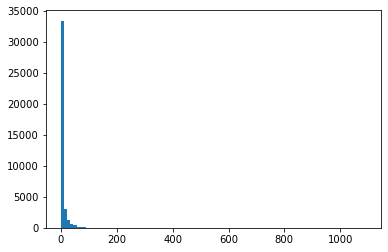

In [557]:
plt.hist(edx_data.nforum_posts, bins = 100)
plt.show()

In [558]:
bins_posts = [0, 5, 20, 50, 9999]
labels_posts = ['A', 'B', 'C', 'D']

pd.cut(edx_data.nforum_posts, bins = bins_posts, labels = labels_posts)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1141730    NaN
1141731    NaN
1141732    NaN
1141733    NaN
1141734    NaN
Name: nforum_posts, Length: 1141735, dtype: category
Categories (4, object): [A < B < C < D]

### Combining All Steps

In [571]:
# function that performs k-anonymization using generalization, blurring, and suppression
def k_anonymize(data, k):
    
    # reduced QI list after blurring
    qi_list_reduced = ['course_id',
                       'continent',
                       'LoE',
                       'YoB',
                       'gender',
                       'nforum_posts',
                       'mode']
    
    # narrow down to only the QIs that we've decided to keep
    reduced_df = data[qi_list_reduced]
    
    # generalize LoE to colleged_educated
    reduced_df.insert(loc=2, column='college_educated', value=reduced_df.LoE.isin(['p', 'm', 'b', 'a', 'p_se', 'p_oth']))
    reduced_df.loc[reduced_df.LoE.isna(), 'college_educated'] = np.nan
    reduced_df = reduced_df.drop(columns='LoE')
    
    # generalize YoB into bins
    bins_YoB = [0, 1930, 1935, 1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]
    labels_YoB = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S']
    
    reduced_df = reduced_df.assign(YoB = pd.cut(reduced_df.YoB, bins = bins_YoB, labels = labels_YoB))
    
    # generalize nforum_posts into bins
    bins_posts = [0, 5, 20, 50, 100, 99999]
    labels_posts = ['A', 'B', 'C', 'D', 'E']
    
    reduced_df = reduced_df.assign(nforum_posts = pd.cut(reduced_df.nforum_posts, bins = bins_posts, labels = labels_posts))
    
    #### Suppress all remaining records that do not satisfy k-anonymity ---------------------------
    
    # generate QI key by concatenating all QIs
    reduced_df['qi_key'] = reduced_df.astype(str).apply(lambda row: '_'.join(row.values), axis=1)
    
    # count number of records per key
    qi_key_counts = reduced_df.qi_key.value_counts().rename_axis('qi_key').reset_index(name='counts')
    
    # produce final dataset with records suppressed
    reduced_df = reduced_df[reduced_df.qi_key.isin(qi_key_counts.query(f'counts >= {k}').qi_key)]
    
    return reduced_df
    

In [572]:
pd.cut([1, 5, 20, 232, 9999], bins = [0, 10, 100], labels = ['A', 'B'])

[A, A, B, NaN, NaN]
Categories (2, object): [A < B]

In [573]:
# k=3 anonymized dataset
k_anonymize(edx_data, 3)

,course_id,continent,college_educated,YoB,gender,nforum_posts,mode,qi_key
0,HarvardX/PH525.1x/1T2018,Europe,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.1x/1T2018_Europe_nan_nan_nan_na...
1,HarvardX/PH525.1x/1T2018,Americas,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.1x/1T2018_Americas_nan_nan_nan_...
2,HarvardX/PH525.1x/1T2018,NaN,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.1x/1T2018_nan_nan_nan_nan_nan_a...
3,HarvardX/PH525.1x/1T2018,North America,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.1x/1T2018_North America_nan_nan...
4,HarvardX/PH525.1x/1T2018,Europe,1.0,M,m,NaN,audit,HarvardX/PH525.1x/1T2018_Europe_1.0_M_m_nan_audit
...,...,...,...,...,...,...,...,...
1141728,HarvardX/PH525.5x/2T2018,Africa,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.5x/2T2018_Africa_nan_nan_nan_na...
1141729,HarvardX/PH525.5x/2T2018,Asia,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.5x/2T2018_Asia_nan_nan_nan_nan_...
1141730,HarvardX/PH525.5x/2T2018,NaN,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.5x/2T2018_nan_nan_nan_nan_nan_a...
1141732,HarvardX/PH525.5x/2T2018,Asia,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.5x/2T2018_Asia_nan_nan_nan_nan_...


In [574]:
# k=4 anonymized dataset
k_anonymize(edx_data, 4)

,course_id,continent,college_educated,YoB,gender,nforum_posts,mode,qi_key
0,HarvardX/PH525.1x/1T2018,Europe,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.1x/1T2018_Europe_nan_nan_nan_na...
1,HarvardX/PH525.1x/1T2018,Americas,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.1x/1T2018_Americas_nan_nan_nan_...
2,HarvardX/PH525.1x/1T2018,NaN,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.1x/1T2018_nan_nan_nan_nan_nan_a...
3,HarvardX/PH525.1x/1T2018,North America,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.1x/1T2018_North America_nan_nan...
4,HarvardX/PH525.1x/1T2018,Europe,1.0,M,m,NaN,audit,HarvardX/PH525.1x/1T2018_Europe_1.0_M_m_nan_audit
...,...,...,...,...,...,...,...,...
1141726,HarvardX/PH525.5x/2T2018,NaN,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.5x/2T2018_nan_nan_nan_nan_nan_a...
1141729,HarvardX/PH525.5x/2T2018,Asia,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.5x/2T2018_Asia_nan_nan_nan_nan_...
1141730,HarvardX/PH525.5x/2T2018,NaN,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.5x/2T2018_nan_nan_nan_nan_nan_a...
1141732,HarvardX/PH525.5x/2T2018,Asia,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.5x/2T2018_Asia_nan_nan_nan_nan_...


In [575]:
# k=5 anonymized dataset
k_anonymize(edx_data, 5)

,course_id,continent,college_educated,YoB,gender,nforum_posts,mode,qi_key
0,HarvardX/PH525.1x/1T2018,Europe,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.1x/1T2018_Europe_nan_nan_nan_na...
1,HarvardX/PH525.1x/1T2018,Americas,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.1x/1T2018_Americas_nan_nan_nan_...
2,HarvardX/PH525.1x/1T2018,NaN,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.1x/1T2018_nan_nan_nan_nan_nan_a...
3,HarvardX/PH525.1x/1T2018,North America,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.1x/1T2018_North America_nan_nan...
4,HarvardX/PH525.1x/1T2018,Europe,1.0,M,m,NaN,audit,HarvardX/PH525.1x/1T2018_Europe_1.0_M_m_nan_audit
...,...,...,...,...,...,...,...,...
1141726,HarvardX/PH525.5x/2T2018,NaN,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.5x/2T2018_nan_nan_nan_nan_nan_a...
1141729,HarvardX/PH525.5x/2T2018,Asia,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.5x/2T2018_Asia_nan_nan_nan_nan_...
1141730,HarvardX/PH525.5x/2T2018,NaN,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.5x/2T2018_nan_nan_nan_nan_nan_a...
1141732,HarvardX/PH525.5x/2T2018,Asia,NaN,NaN,NaN,NaN,audit,HarvardX/PH525.5x/2T2018_Asia_nan_nan_nan_nan_...


In [576]:
# function to compute course-level metrics for different levels of k-anonymization
def gen_metric_table(metric):

    # list to store each of the metric dataframes computed at each level of k-anonymity
    metric_df_list = []

    # first dataframe is computed using the full dataset
    metric_df = edx_data.groupby('course_id')[metric].sum().reset_index()
    metric_df.rename(columns={f'{metric}':f'{metric}_full'}, inplace=True)
    metric_df_list.append(metric_df)

    # repeat for different levels of k-anonymity
    for k in [3, 4, 5]:
        reduced_df = edx_data.loc[k_anonymize(edx_data, k).index]
        metric_df = reduced_df.groupby('course_id')[metric].sum().reset_index()
        metric_df.rename(columns={f'{metric}':f'{metric}_k{k}'}, inplace=True)
        metric_df_list.append(metric_df)

    # generate the final table by outer joining all individual tables on course_id
    rate_table = reduce(lambda left, right: pd.merge(left, right, on='course_id', how='outer'), metric_df_list)
    
    return rate_table

In [577]:
gen_metric_table('completed')

,course_id,completed_full,completed_k3,completed_k4,completed_k5
0,HarvardX/1368.1x/2T2016,42.0,23.0,22.0,20.0
1,HarvardX/1368.1x/3T2014,72.0,29.0,25.0,15.0
2,HarvardX/1368.2x/2T2015,51.0,17.0,17.0,16.0
3,HarvardX/1368.2x/2T2016,36.0,18.0,16.0,12.0
4,HarvardX/1368.3x/2T2015,90.0,39.0,34.0,29.0
...,...,...,...,...,...
275,Harvardx/HLS2X/T12016,347.0,257.0,223.0,205.0
276,VJx/VJx/3T2014,195.0,113.0,98.0,84.0
277,VJx/VJx/3T2015,56.0,37.0,27.0,24.0
278,VJx/VJx_2/3T2016,56.0,15.0,12.0,9.0


In [578]:
gen_metric_table('explored')

,course_id,explored_full,explored_k3,explored_k4,explored_k5
0,HarvardX/1368.1x/2T2016,103,70.0,64.0,57.0
1,HarvardX/1368.1x/3T2014,166,93.0,81.0,67.0
2,HarvardX/1368.2x/2T2015,94,45.0,44.0,42.0
3,HarvardX/1368.2x/2T2016,63,33.0,30.0,23.0
4,HarvardX/1368.3x/2T2015,144,79.0,74.0,68.0
...,...,...,...,...,...
275,Harvardx/HLS2X/T12016,574,464.0,423.0,399.0
276,VJx/VJx/3T2014,413,292.0,269.0,251.0
277,VJx/VJx/3T2015,102,67.0,55.0,47.0
278,VJx/VJx_2/3T2016,110,51.0,45.0,37.0


In [581]:
gen_metric_table('completed').to_csv('course_completion_rates.csv')
gen_metric_table('explored').to_csv('course_exploration_rates.csv')

In [567]:
edx_data.explored.mean()

0.20933262789857493

In [568]:
edx_data.groupby('course_id')['explored'].sum()

course_id
HarvardX/1368.1x/2T2016    103
HarvardX/1368.1x/3T2014    166
HarvardX/1368.2x/2T2015     94
HarvardX/1368.2x/2T2016     63
HarvardX/1368.3x/2T2015    144
                          ... 
Harvardx/HLS2X/T12016      574
VJx/VJx/3T2014             413
VJx/VJx/3T2015             102
VJx/VJx_2/3T2016           110
VJx/VJx_S/3T2015           116
Name: explored, Length: 280, dtype: int64

### Q6: L-Diversity

In [606]:
def l_diversity(k, metric):
    k_df = k_anonymize(edx_data, k)
    k_df[metric] = edx_data.loc[k_df.index][metric]
    
    return k_df.groupby('qi_key')[metric].agg(['count', 'nunique']).sort_values(by='nunique')

In [607]:
l_diversity(k=3, metric='grade')

,count,nunique
qi_key,,
HarvardX/1368.1x/2T2016_Africa_0.0_O_m_nan_honor,4,1
HarvardX/MCB80.1x/2T2016_nan_1.0_N_f_nan_audit,44,1
HarvardX/MCB80.1x/2T2016_nan_1.0_M_m_nan_audit,23,1
HarvardX/MCB80.1x/2T2016_nan_1.0_M_f_nan_audit,37,1
HarvardX/MCB80.1x/2T2016_nan_1.0_L_m_nan_audit,15,1
...,...,...
HarvardX/SPU30x/2T2016_Americas_1.0_M_m_nan_honor,181,45
HarvardX/PH526x/3T2016_Americas_nan_nan_nan_nan_audit,322,46
HarvardX/PH526x/3T2016_Europe_nan_nan_nan_nan_audit,264,47


In [608]:
l_diversity(k=4, metric='grade')

,count,nunique
qi_key,,
HarvardX/1368.1x/2T2016_Africa_0.0_O_m_nan_honor,4,1
HarvardX/MCB80.1x/2013_SOND_Americas_0.0_F_m_nan_honor,9,1
HarvardX/MCB80.1x/2013_SOND_Americas_0.0_F_f_nan_honor,7,1
HarvardX/MCB80.1x/2013_SOND_Africa_1.0_N_f_nan_honor,28,1
HarvardX/MCB80.1x/2013_SOND_Africa_1.0_K_f_nan_honor,5,1
...,...,...
HarvardX/SPU30x/2T2016_Americas_1.0_M_m_nan_honor,181,45
HarvardX/PH526x/3T2016_Americas_nan_nan_nan_nan_audit,322,46
HarvardX/PH526x/3T2016_Europe_nan_nan_nan_nan_audit,264,47


In [609]:
l_diversity(k=5, metric='grade')

,count,nunique
qi_key,,
HarvardX/MCB63X/3T2015_South America_1.0_M_f_nan_honor,5,1
HarvardX/MCB63X/1T2018_nan_nan_O_nan_nan_audit,0,1
HarvardX/MCB63X/1T2018_nan_nan_nan_nan_A_audit,0,1
HarvardX/MCB63X/1T2018_nan_nan_nan_nan_nan_audit,0,1
HarvardX/MCB63X/2T2017_Africa_0.0_N_m_nan_audit,6,1
...,...,...
HarvardX/SPU30x/2T2016_Americas_1.0_M_m_nan_honor,181,45
HarvardX/PH526x/3T2016_Americas_nan_nan_nan_nan_audit,322,46
HarvardX/PH526x/3T2016_Europe_nan_nan_nan_nan_audit,264,47
